# Exploring the ALFALFA catalog
I've downloaded the full ALFALFA souce catalogs from their website: http://egg.astro.cornell.edu/alfalfa/data/index.php and stored these data in `../data`.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
%matplotlib inline

PATH = os.path.abspath('..')

In [5]:
df = pd.read_csv(f'{PATH}/data/a100.code12.tab1.180315.csv', skipinitialspace=True, index_col=0)
df.sample(5)

,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
AGCNr,,,,,,,,,,,,,,,,,,
732831,........,209.66541,27.71528,209.66832,27.71000,13974,33,7,181,0.43,0.04,7.2,2.25,202.8,2.2,9.62,0.06,1
321213,........,337.15543,26.63000,337.15503,26.62972,12345,243,6,109,2.50,0.09,16.2,2.22,171.5,2.2,10.24,0.05,1
181900,........,134.47124,6.62139,134.46542,6.62361,16283,88,11,180,0.62,0.07,5.8,2.52,236.9,2.3,9.91,0.07,2
254287,........,226.53168,32.12222,226.52708,32.10833,12887,161,43,338,0.97,0.08,7.2,2.38,186.1,2.4,9.90,0.06,1
180950,031-062.,122.68918,7.46694,122.68500,7.47278,4520,172,6,193,0.98,0.08,6.9,2.39,67.1,2.4,9.02,0.06,1


In [13]:
df.drop(df.index[(df.HIcode == 2) |
                 (df.RAdeg_OC.isnull())
                ], 
        inplace=True)

In [14]:
df.sample(5)

,Name,RAdeg_HI,DECdeg_HI,RAdeg_OC,DECdeg_OC,Vhelio,W50,sigW,W20,HIflux,sigflux,SNR,RMS,Dist,sigDist,logMH,siglogMH,HIcode
AGCNr,,,,,,,,,,,,,,,,,,
732766,........,206.48083,24.38528,206.47168,24.38611,10531,285,30,161,1.32,0.10,7.4,2.36,153.9,2.4,9.87,0.06,1
257890,........,229.01334,13.58583,229.00876,13.59805,6995,137,6,98,1.25,0.10,7.2,3.27,102.2,2.3,9.49,0.06,1
719211,........,164.32625,17.26389,164.33041,17.27306,9270,310,10,318,3.29,0.11,17.6,2.37,137.2,2.2,10.16,0.05,1
105096,........,0.71417,13.09889,0.71750,13.09639,5201,174,6,192,1.62,0.09,10.6,2.59,73.6,2.2,9.32,0.06,1
268341,........,246.78709,28.43611,246.77542,28.42472,14929,46,8,120,0.69,0.04,9.7,2.28,213.8,2.4,9.87,0.05,1


In [25]:
len(df)

25434

# Examine HI and other properties

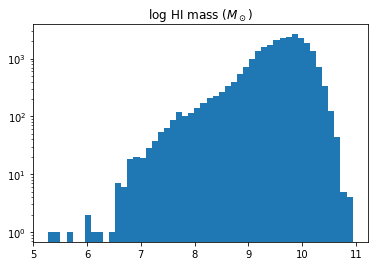

In [22]:
df.logMH.hist(bins=50, grid=False, log=True)
plt.title(r'log HI mass ($M_\odot$)');

It's worth noting that HI nondetections are not included in here, so that might make it trickier to estimate HI mass.

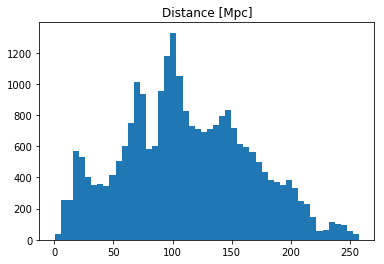

In [24]:
df.Dist.hist(bins=50, grid=False)
plt.title('Distance [Mpc]');

# Cut in HI mass
Let's see how many sources are around if we cut out all below $10^9$ solar masses.

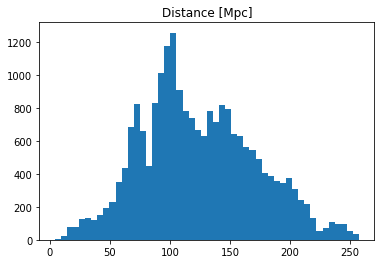

In [26]:
df1 = df[df.logMH > 9].copy()
df1.Dist.hist(bins=50, grid=False)
plt.title('Distance [Mpc]');

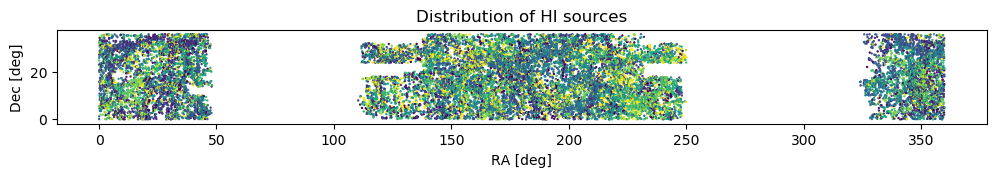

In [47]:
plt.figure(figsize=(12, 3), dpi=100)
plt.scatter(x='RAdeg_HI', y='DECdeg_HI', data=df1, c='Dist', s=0.5, vmin=50, vmax=200)
plt.axes().set_aspect('equal', 'box')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.title('Distribution of HI sources');

# Cut in distance
let's keep the nearby stuff

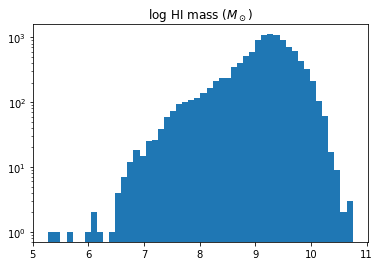

In [41]:
df2 = df[df.Dist < 100].copy()
df2.logMH.hist(bins=50, grid=False, log=True)
plt.title(r'log HI mass $(M_\odot)$');

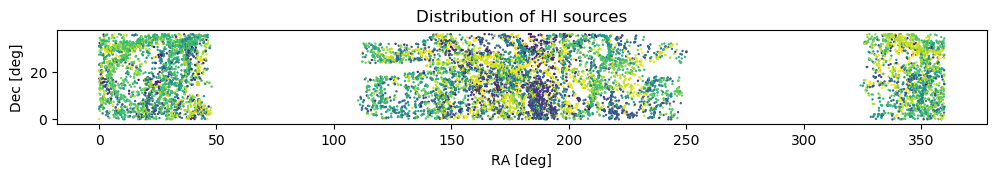

In [43]:
plt.figure(figsize=(12, 3), dpi=100)
plt.scatter(x='RAdeg_HI', y='DECdeg_HI', data=df2, c='Dist', s=0.5)
plt.axes().set_aspect('equal', 'box')
plt.xlabel('RA [deg]')
plt.ylabel('Dec [deg]')
plt.title('Distribution of HI sources');